In [55]:
import pandas as pd
import numpy as np

In [56]:
data=pd.read_csv('salary.csv')
data.head()


,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [57]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB
None


In [58]:
X=data[['age','education.num','capital.gain','hours.per.week']]
Y=data['income']

In [59]:
print(X,Y)

       age  education.num  capital.gain  hours.per.week
0       90              9             0              40
1       82              9             0              18
2       66             10             0              40
3       54              4             0              40
4       41             10             0              40
...    ...            ...           ...             ...
32556   22             10             0              40
32557   27             12             0              38
32558   40              9             0              40
32559   58              9             0              40
32560   22              9             0              20

[32561 rows x 4 columns] 0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object


In [60]:
#encode output
Y=(Y.map({'<=50K': 0, '>50K': 1}).astype(int))
print(Y)


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32


In [61]:
#Normalise input features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X) 
print(X)

[[ 3.76961234 -0.42005962 -0.14592048 -0.03542945]
 [ 3.18311167 -0.42005962 -0.14592048 -1.81720429]
 [ 2.01011032 -0.03136003 -0.14592048 -0.03542945]
 ...
 [ 0.10398314 -0.42005962 -0.14592048 -0.03542945]
 [ 1.42360965 -0.42005962 -0.14592048 -0.03542945]
 [-1.21564337 -0.42005962 -0.14592048 -1.65522476]]


In [62]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=42)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier().fit(train_x,train_y)


In [64]:
from sklearn import metrics
pred_y1=model1.predict(test_x)
print('ROC_AUC Score for Model1:',metrics.roc_auc_score(test_y,pred_y1))

ROC_AUC Score for Model1: 0.6750786991613094


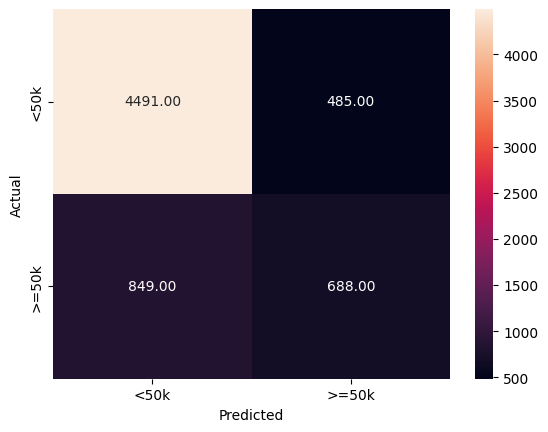

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(test_y,pred_y1)
sns.heatmap(cm,fmt=".2f",xticklabels=["<50k",">=50k"],yticklabels=["<50k",">=50k"],annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [66]:
from sklearn.metrics import classification_report
crpt=classification_report(test_y,pred_y1)
print(crpt)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4976
           1       0.59      0.45      0.51      1537

    accuracy                           0.80      6513
   macro avg       0.71      0.68      0.69      6513
weighted avg       0.78      0.80      0.79      6513



In [67]:
#Hypertuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
hyperparams={'n_neighbors':range(15,30)}
gcv_model=GridSearchCV(KNeighborsClassifier(),hyperparams,cv=10,scoring='roc_auc')
gcv_model.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(15, 30)}, scoring='roc_auc')

In [68]:
print('Best params:',gcv_model.best_params_)
print('Best score:',gcv_model.best_score_)


Best params: {'n_neighbors': 29}
Best score: 0.8344678662352314


Text(0, 0.5, 'Mean Error')

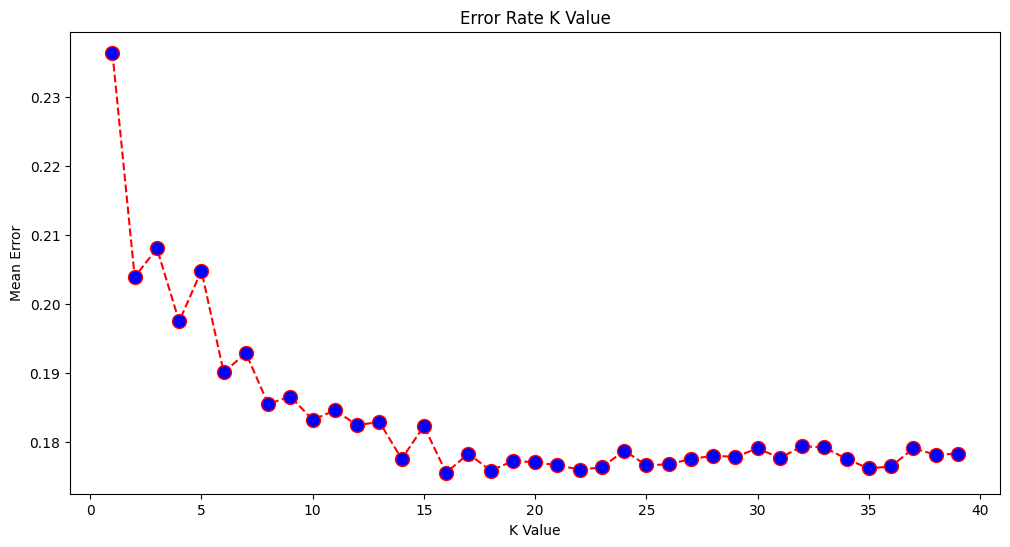

In [69]:
error=[]
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x, train_y)
    pred_i = model.predict(test_x)
    error.append(np.mean(pred_i != test_y))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [70]:
from sklearn import metrics
#Build model again with Best params
model2=KNeighborsClassifier(n_neighbors=29).fit(train_x,train_y)
print('ROC_AUC Score for Model2:',metrics.roc_auc_score(test_y,model2.predict(test_x)))
model3=KNeighborsClassifier(n_neighbors=16).fit(train_x,train_y)
print('ROC_AUC Score for Model3:',metrics.roc_auc_score(test_y,model3.predict(test_x)))

ROC_AUC Score for Model2: 0.6781498492699898
ROC_AUC Score for Model3: 0.6780832968973257


In [71]:
#Both models got almost same accuracy